In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
automobile = pd.read_csv('/content/drive/MyDrive/YapayZekaUzmanı/veribilimiders/ders_6/Automobile_data.csv')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
print(automobile['symboling'].unique())

[ 3  1  2  0 -1 -2]


In [ ]:
print(automobile.groupby('symboling').size())

symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
dtype: int64


In [ ]:
automobile["make"] = automobile["make"].astype('category')
automobile["fuel-type"] = automobile["fuel-type"].astype('category')
automobile["aspiration"] = automobile["aspiration"].astype('category')
automobile["num-of-doors"] = automobile["num-of-doors"].astype('category')
automobile["body-style"] = automobile["body-style"].astype('category')
automobile["drive-wheels"] = automobile["drive-wheels"].astype('category')
automobile["engine-location"] = automobile["engine-location"].astype('category')
automobile["fuel-system"] = automobile["fuel-system"].astype('category')
automobile["engine-type"] = automobile["engine-type"].astype('category')
automobile["num-of-cylinders"] = automobile["num-of-cylinders"].astype('category')


In [ ]:
automobile["make"] = automobile["make"].cat.codes
automobile["fuel-type"] = automobile["fuel-type"].cat.codes
automobile["aspiration"] = automobile["aspiration"].cat.codes
automobile["num-of-doors"] = automobile["num-of-doors"].cat.codes
automobile["body-style"] = automobile["body-style"].cat.codes
automobile["drive-wheels"] = automobile["drive-wheels"].cat.codes
automobile["engine-location"] = automobile["engine-location"].cat.codes
automobile["fuel-system"] = automobile["fuel-system"].cat.codes
automobile["engine-type"] = automobile["engine-type"].cat.codes
automobile["num-of-cylinders"] = automobile["num-of-cylinders"].cat.codes


In [ ]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


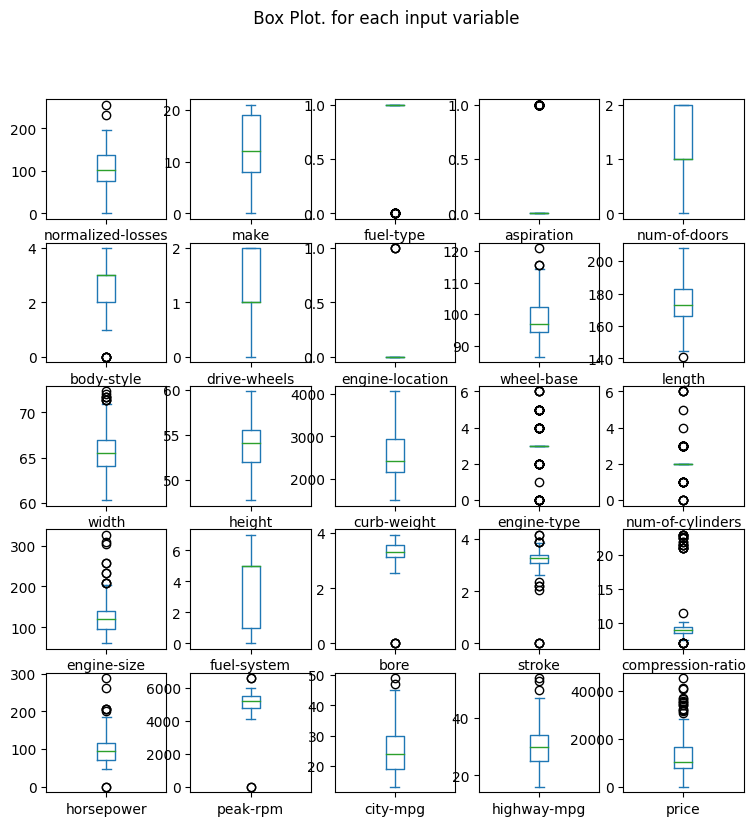

In [ ]:
automobile.drop('symboling', axis=1).plot(kind='box', subplots=True, layout=(5,5), sharex =False, sharey = False,
                                          figsize= (9,9), title = ' Box Plot. for each input variable')
plt.savefig('automobile_box')
plt.show()


In [ ]:
pip install threadpoolctl==3.1.0

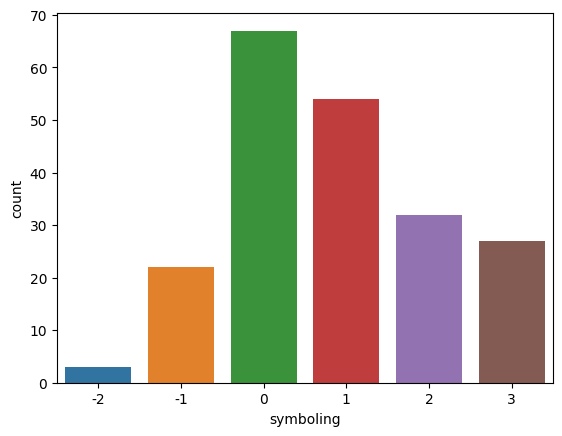

In [ ]:

sns.countplot(automobile, x='symboling')
plt.show()

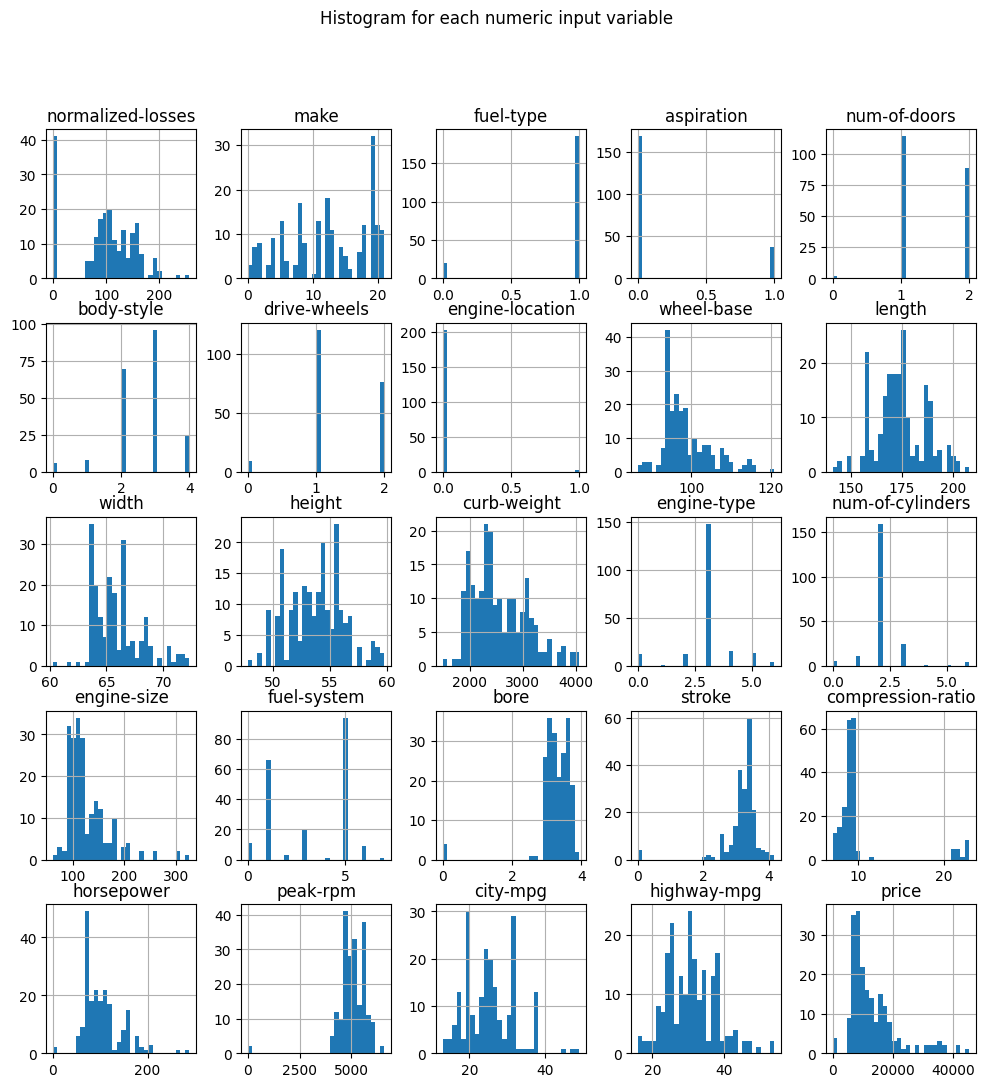

In [ ]:
import pylab as pl

automobile.drop('symboling', axis=1).hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('aoutomobile_hist')
plt.show()


<ipython-input-31-61417463b60e>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


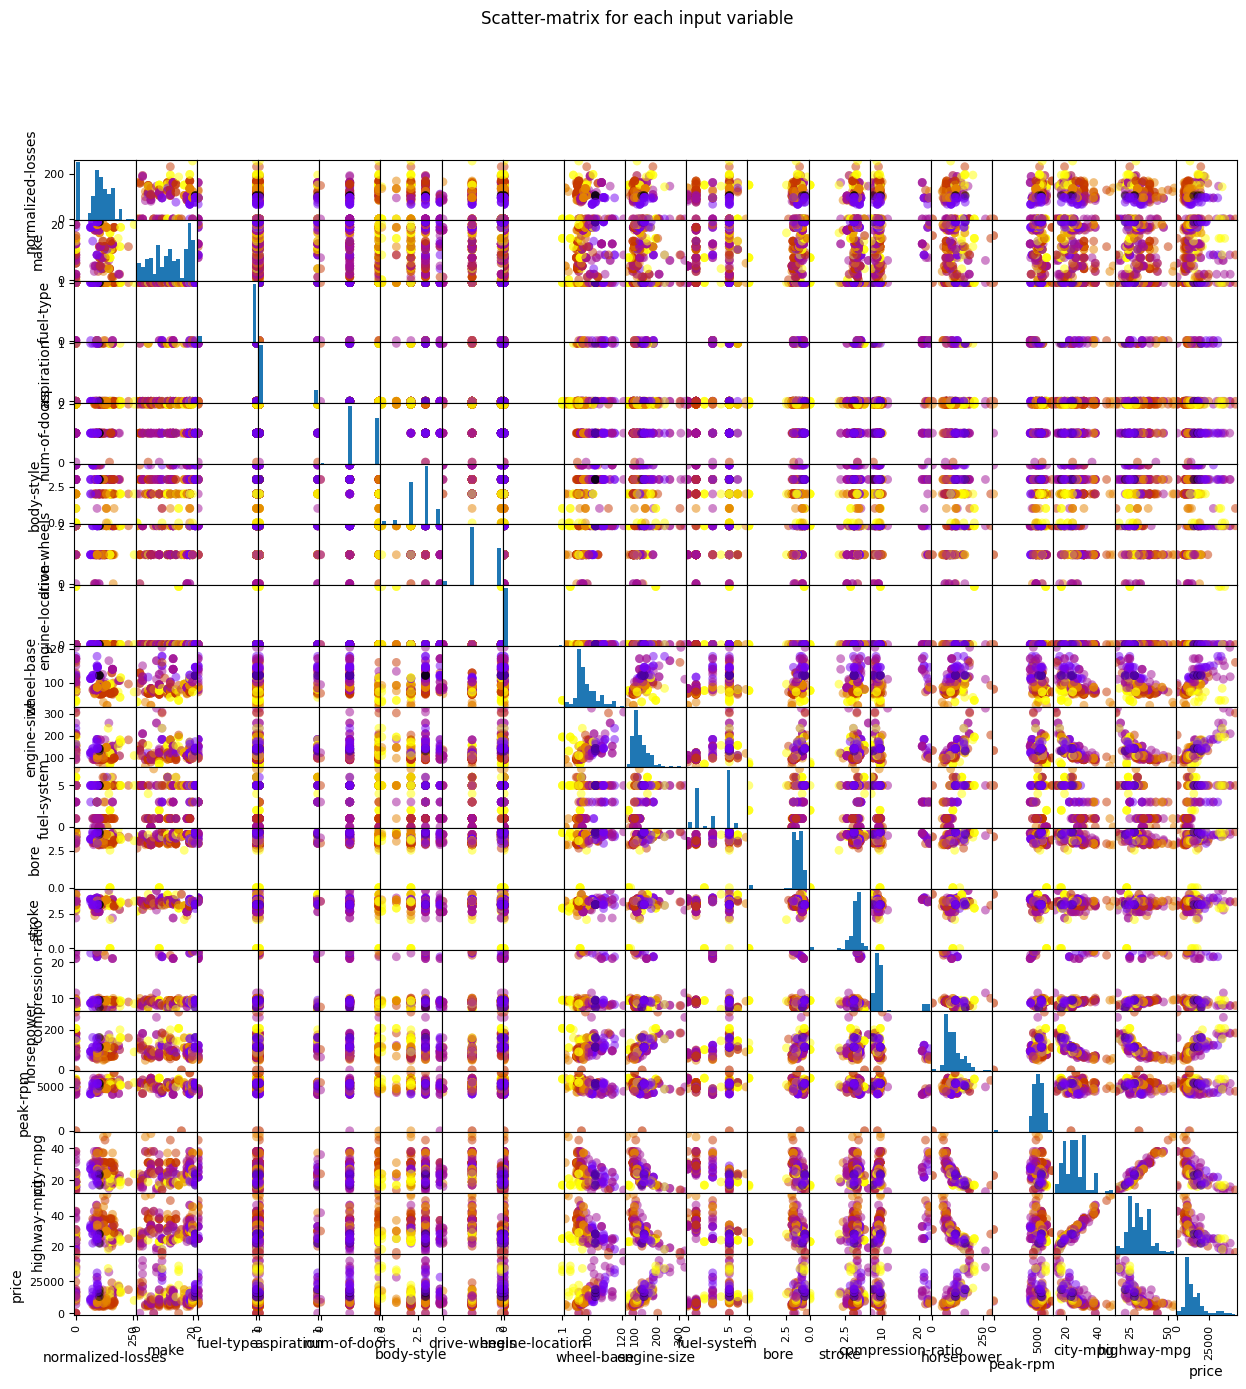

In [ ]:
from matplotlib import cm

feature_names = ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors'
                , 'body-style', 'drive-wheels', 'engine-location', 'wheel-base'
                , 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio'
                , 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

X = automobile[feature_names]
y = automobile['symboling']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c =y, marker ='o', s =40,
                                     hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('automobile_scatter_matrix')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.67
Accuracy of Logistic regression classifier on test set: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on training set: 0.77


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
      .format(knn.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on training set: 0.73
Accuracy of KNeighborsClassifier on training set: 0.56


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
print('Accuracy of GNB Classifier on training set: {:.2f}'
      .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB Classifier on training set: {:.2f}'
      .format(gnb.score(X_test, y_test)))

Accuracy of GNB Classifier on training set: 0.54
Accuracy of GNB Classifier on training set: 0.44


In [ ]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
print('Accuracy of SVM Classifier on training set: {:.2f}'
      .format(svm.score(X_train, y_train)))
print('Accuracy of SVM Classifier on training set: {:.2f}'
      .format(svm.score(X_test, y_test)))

Accuracy of SVM Classifier on training set: 0.66
Accuracy of SVM Classifier on training set: 0.38


In [ ]:
y_pred_class = clf.predict(X_test)

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)

[[ 2  0  1  0  0]
 [ 1 12  1  0  0]
 [ 0  2 10  1  1]
 [ 0  2  1  9  0]
 [ 0  1  0  0  8]]


In [ ]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7884615384615384


In [ ]:
print(metrics.classification_report(y_test,y_pred_class, digits=3))

              precision    recall  f1-score   support

          -1      0.667     0.667     0.667         3
           0      0.706     0.857     0.774        14
           1      0.769     0.714     0.741        14
           2      0.900     0.750     0.818        12
           3      0.889     0.889     0.889         9

    accuracy                          0.788        52
   macro avg      0.786     0.775     0.778        52
weighted avg      0.797     0.788     0.789        52

